# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
df.shape

(2000, 8)

In [5]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
df.nunique()

ID                 2000
Sex                   2
Marital status        2
Age                  58
Education             4
Income             1982
Occupation            3
Settlement size       3
dtype: int64

In [7]:
print('Sex            : ', df.Sex.unique())
print('Marital status : ', df['Marital status'].unique())
print('Education      : ', df.Education.unique())
print('Occupation     : ', df.Occupation.unique())
print('Settlement size: ', df['Settlement size'].unique())

Sex            :  [0 1]
Marital status :  [0 1]
Education      :  [2 1 0 3]
Occupation     :  [1 0 2]
Settlement size:  [2 0 1]


## Dealing with duplicate values

In [8]:
df.duplicated().sum()

0

## Dealing With missing values

In [9]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

# EDA Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

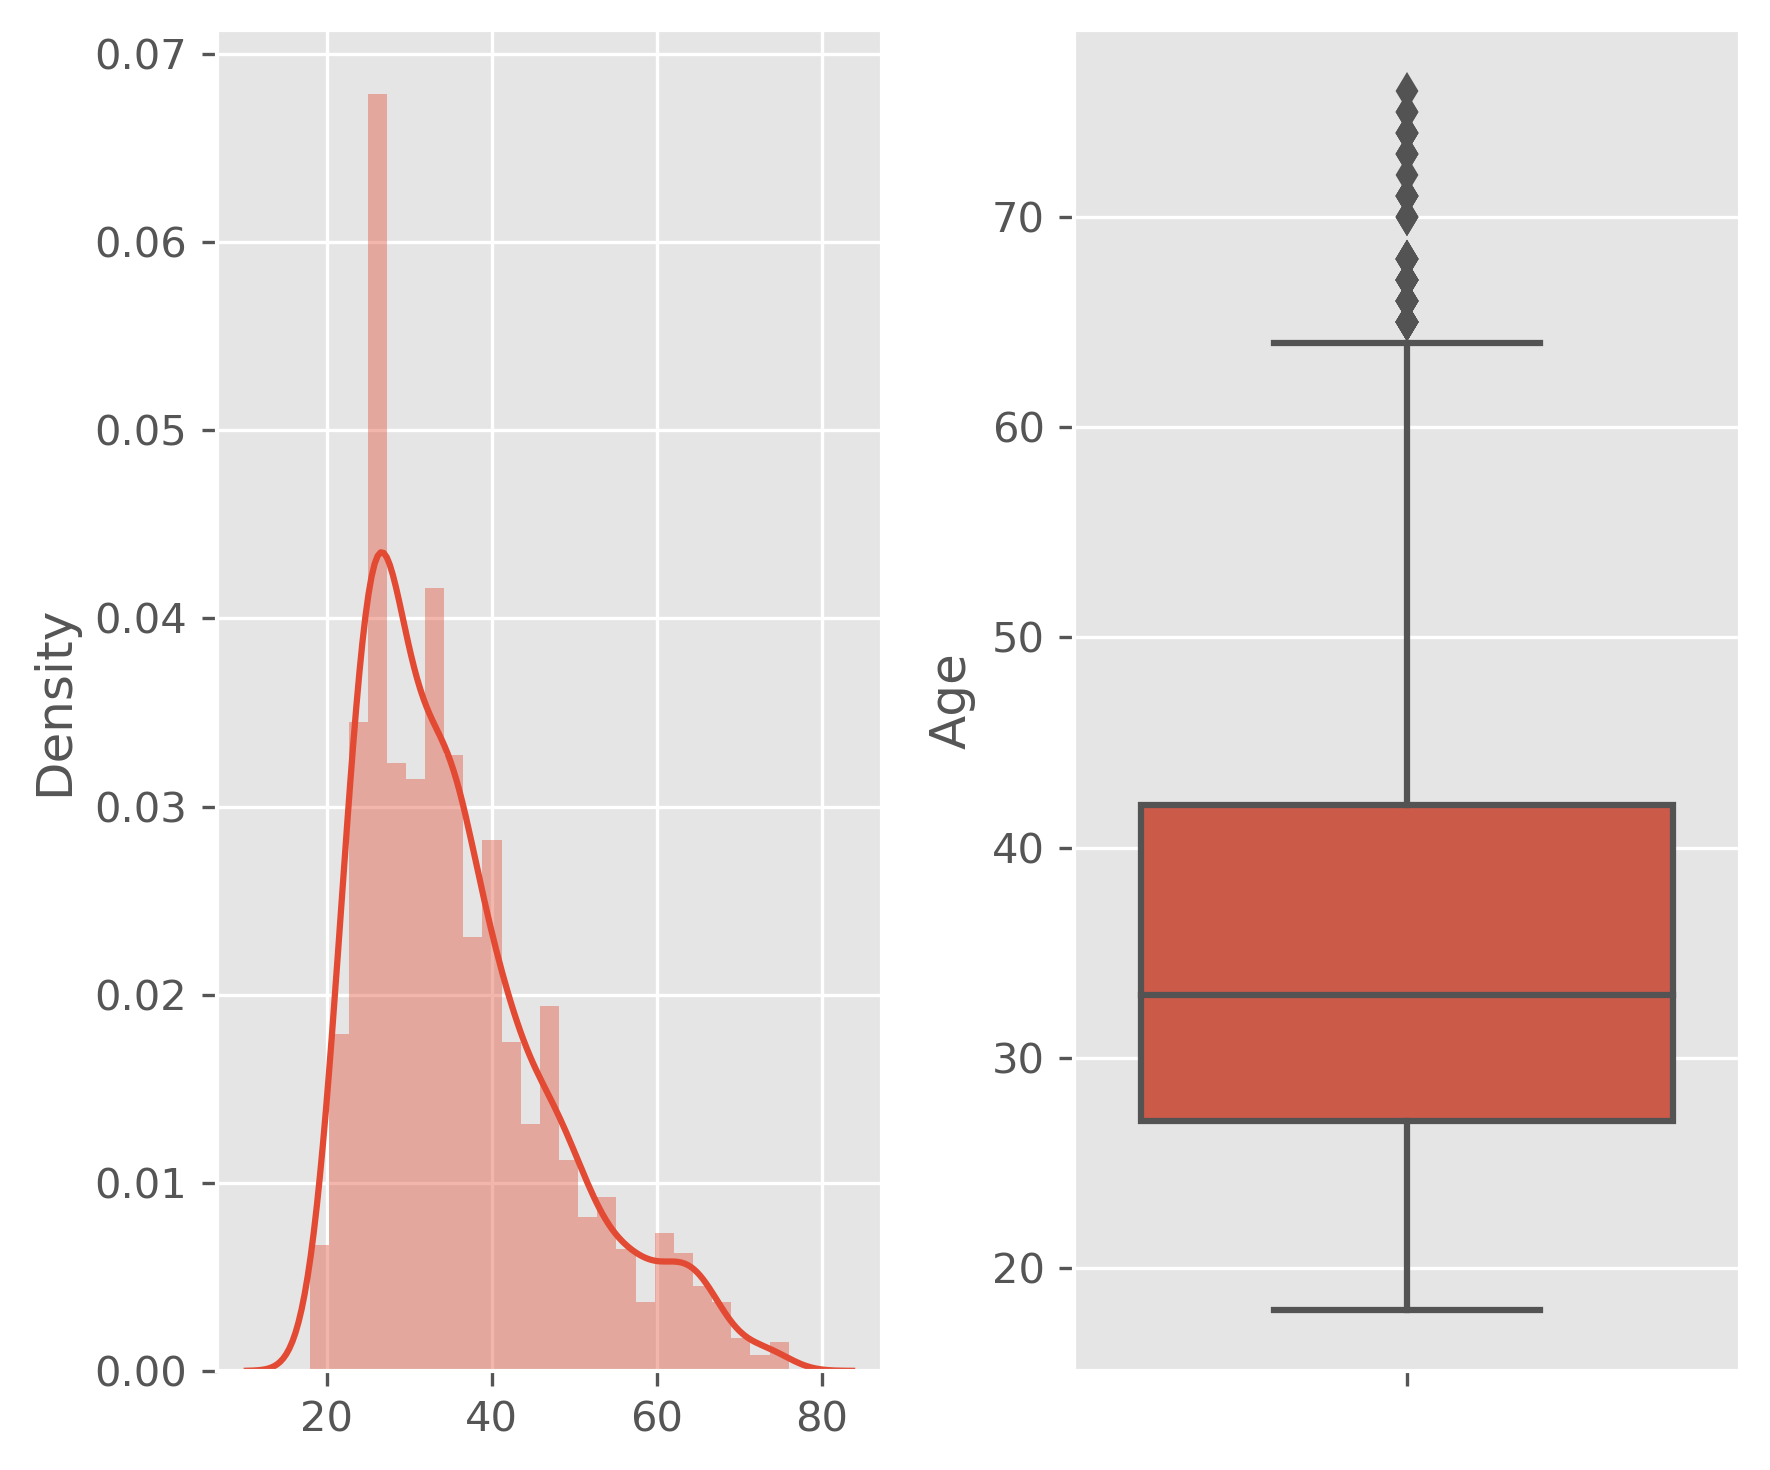

In [10]:
plt.figure(figsize=(6,5), dpi=300)
plt.subplot(1,2,1)
sns.distplot(x=df['Age'])

plt.subplot(1,2,2)
sns.boxplot(y=df['Age'])

plt.tight_layout()
plt.show

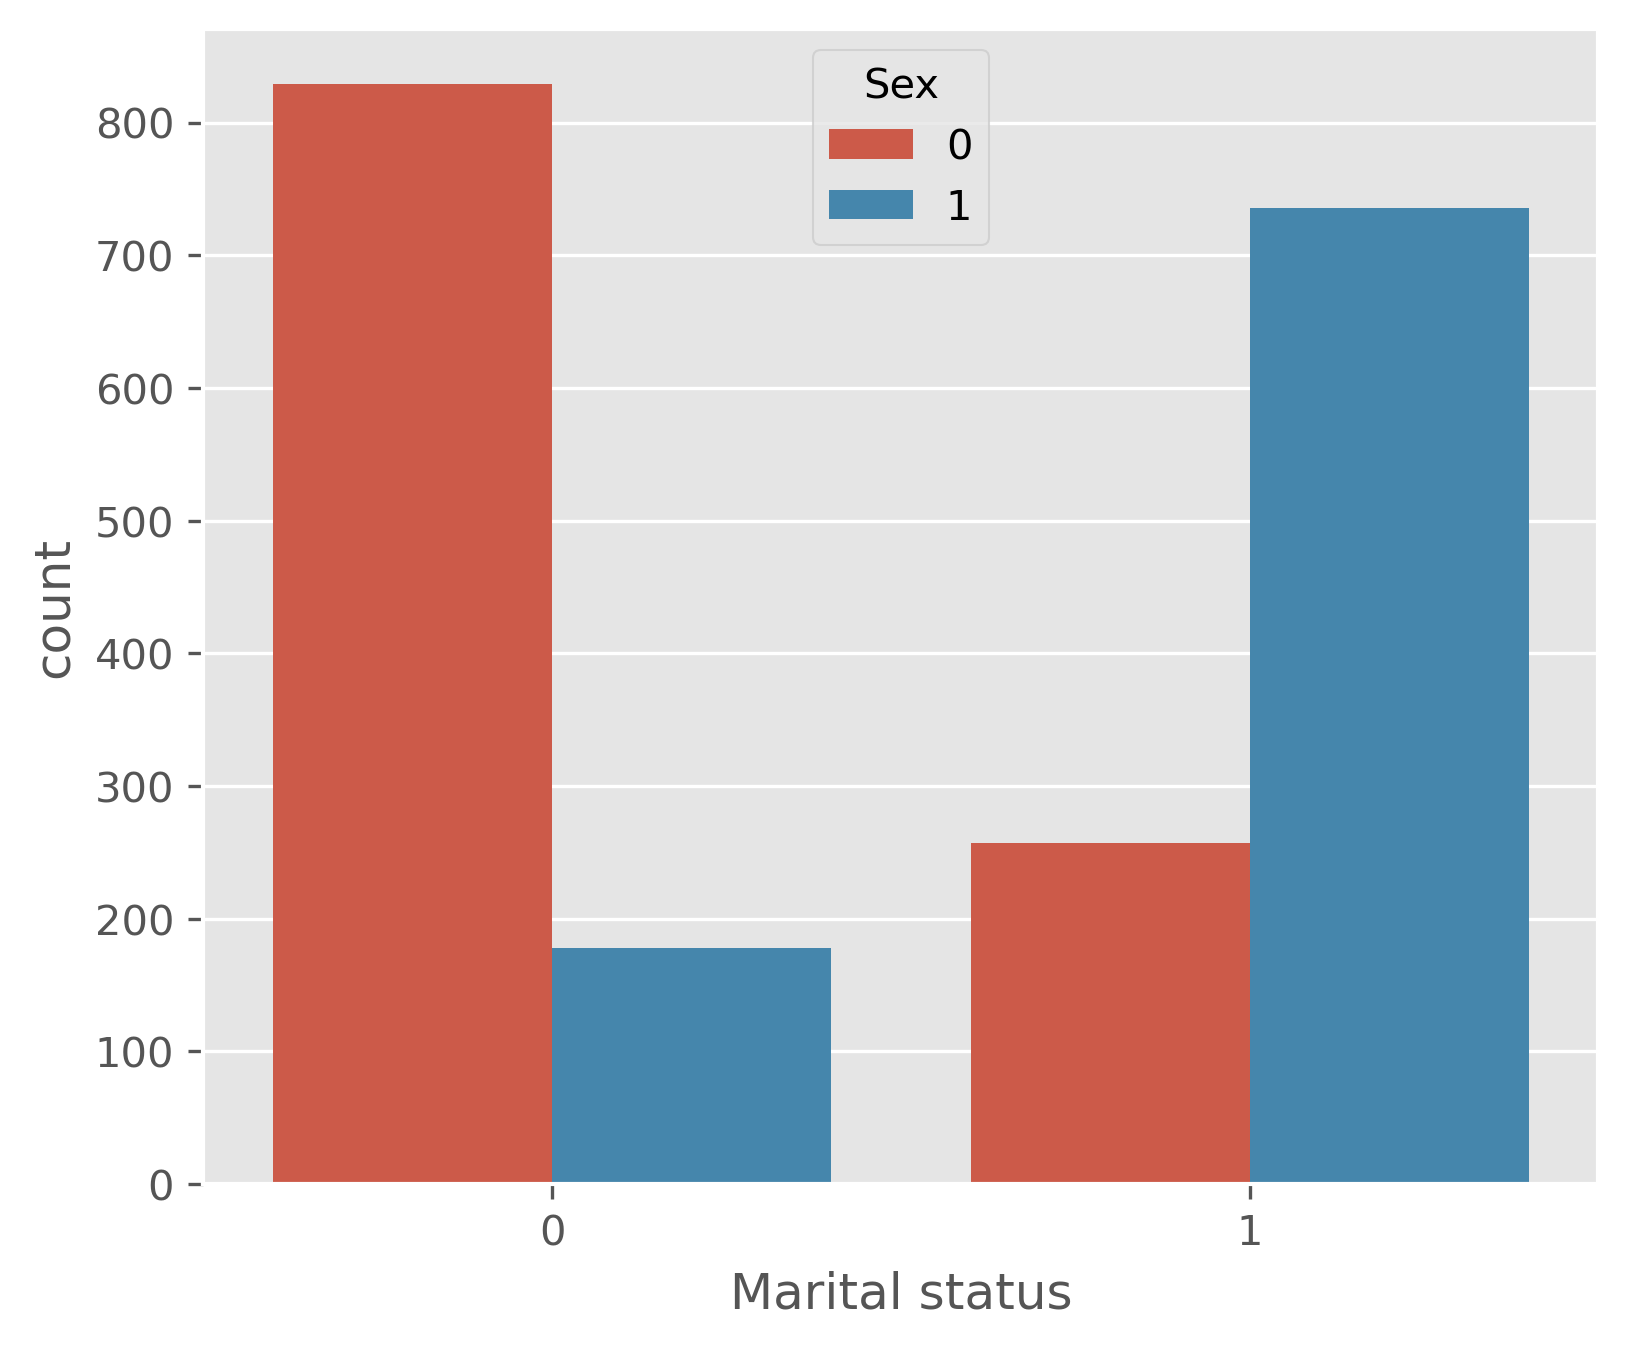

In [11]:
plt.figure(figsize=(6,5), dpi=300)
sns.countplot(x='Marital status',hue='Sex', data=df)
plt.show()

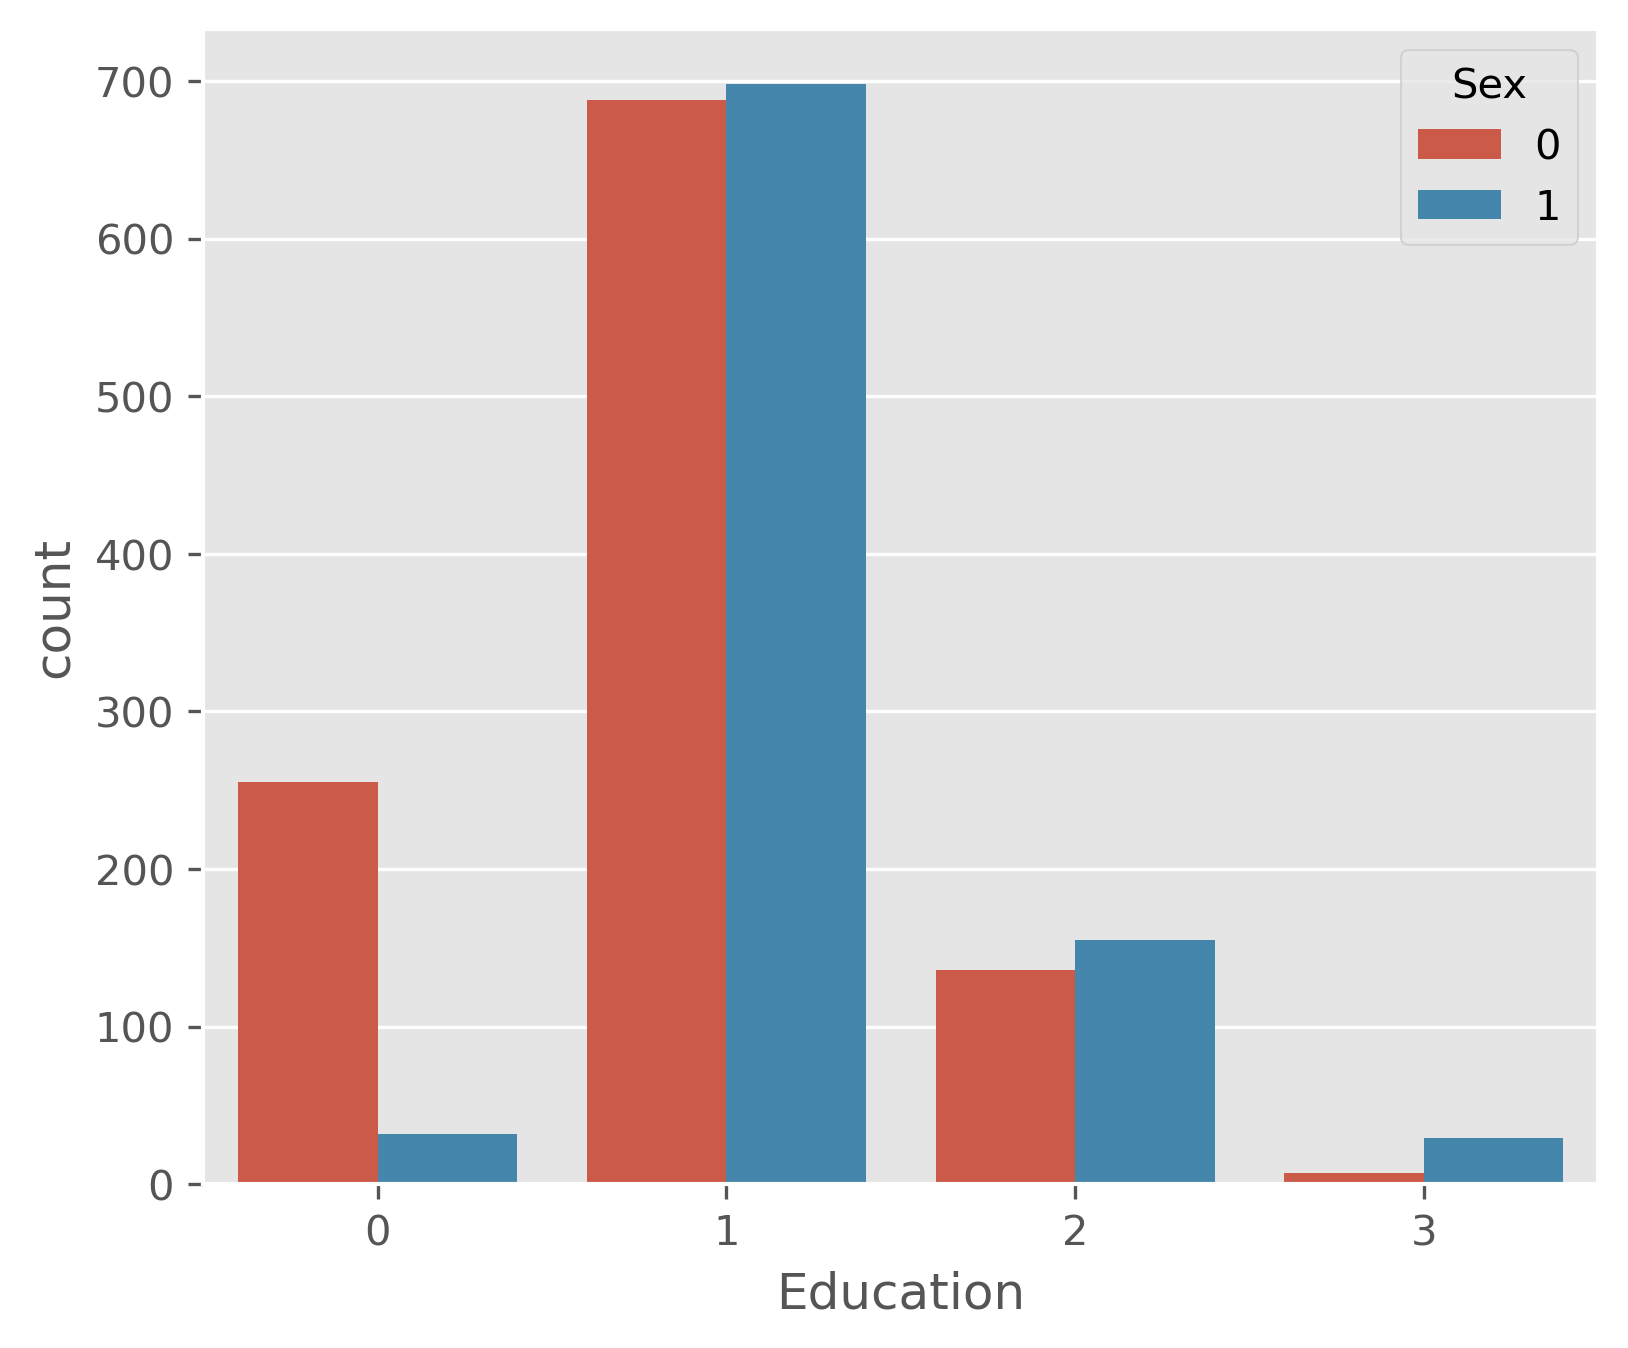

In [12]:
plt.figure(figsize=(6,5), dpi=300)
sns.countplot(x='Education',hue='Sex', data=df)
plt.show()

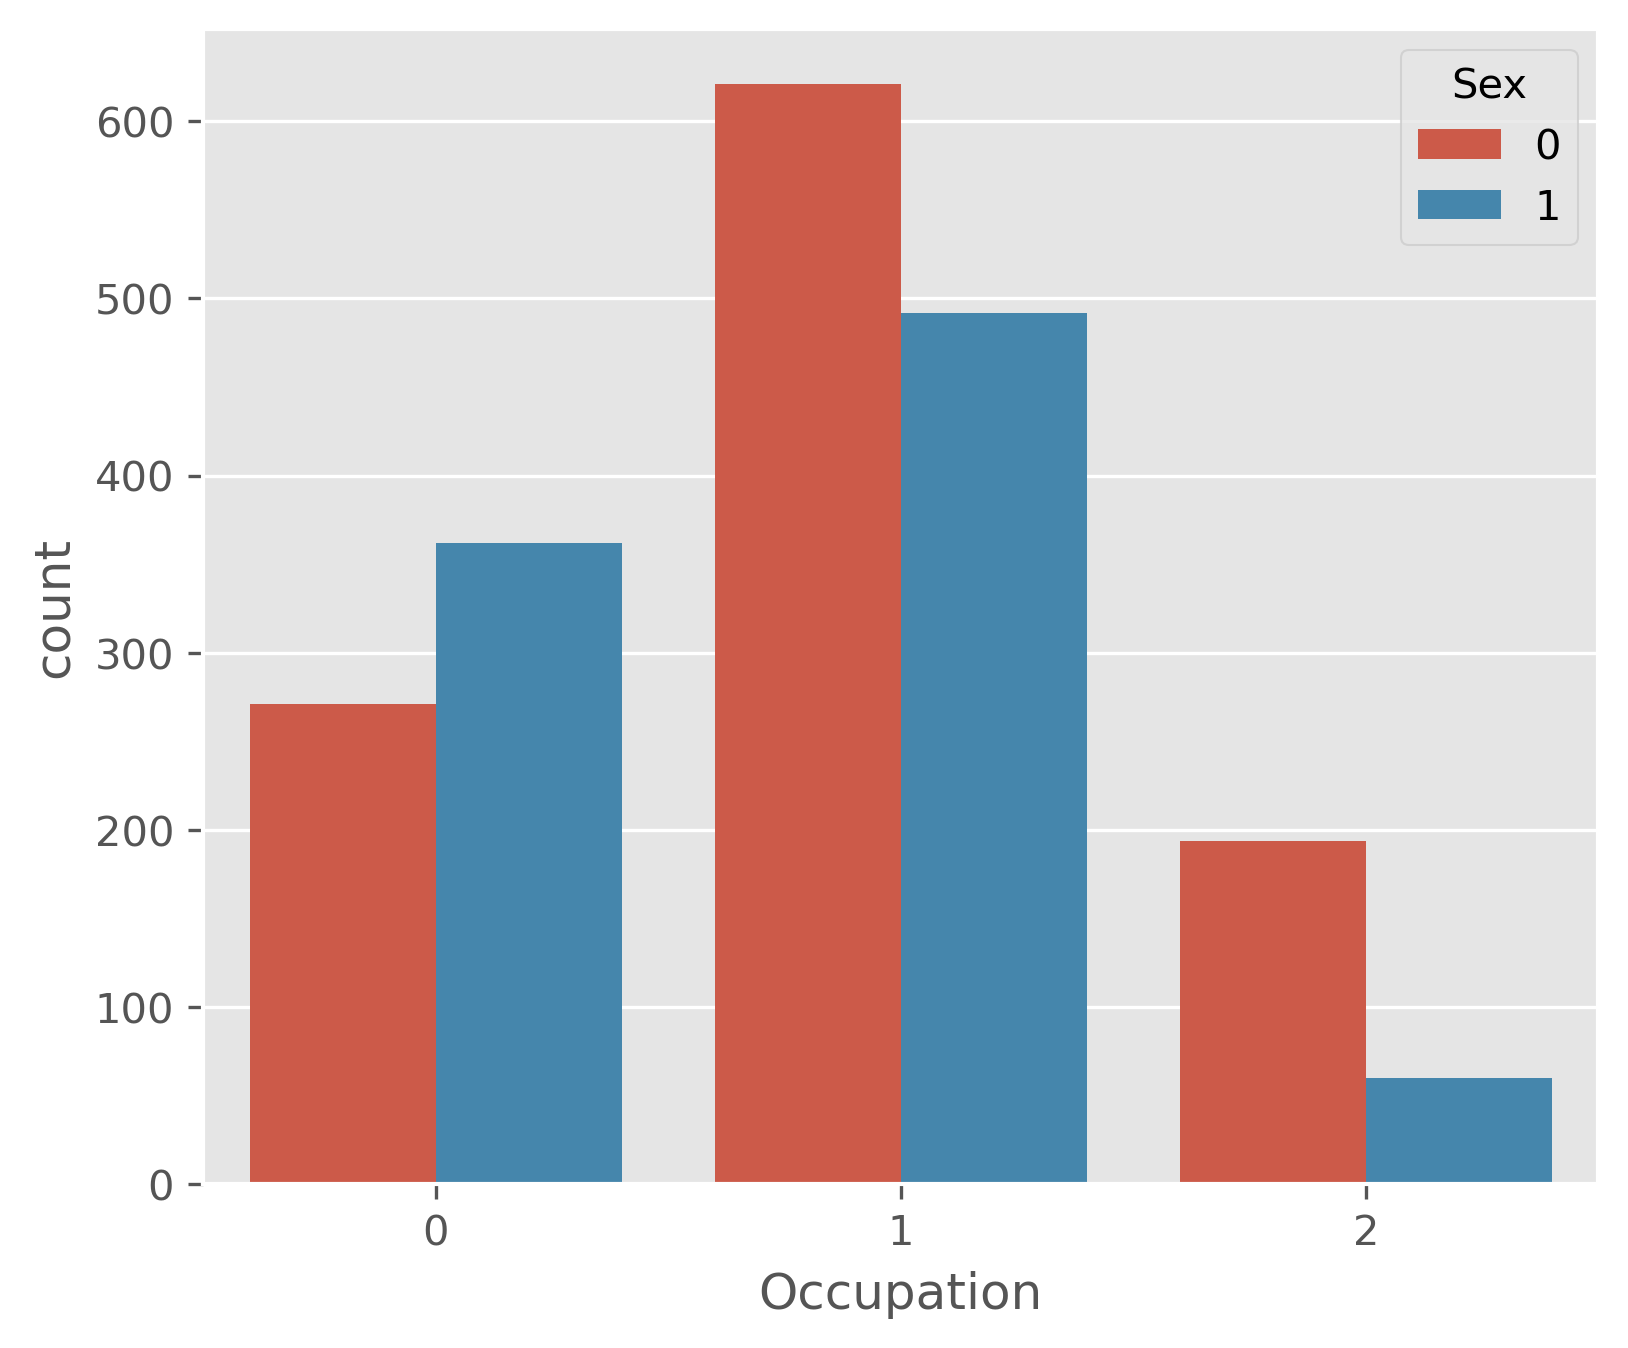

In [13]:
plt.figure(figsize=(6,5), dpi=300)
sns.countplot(x='Occupation',hue='Sex', data=df)
plt.show()

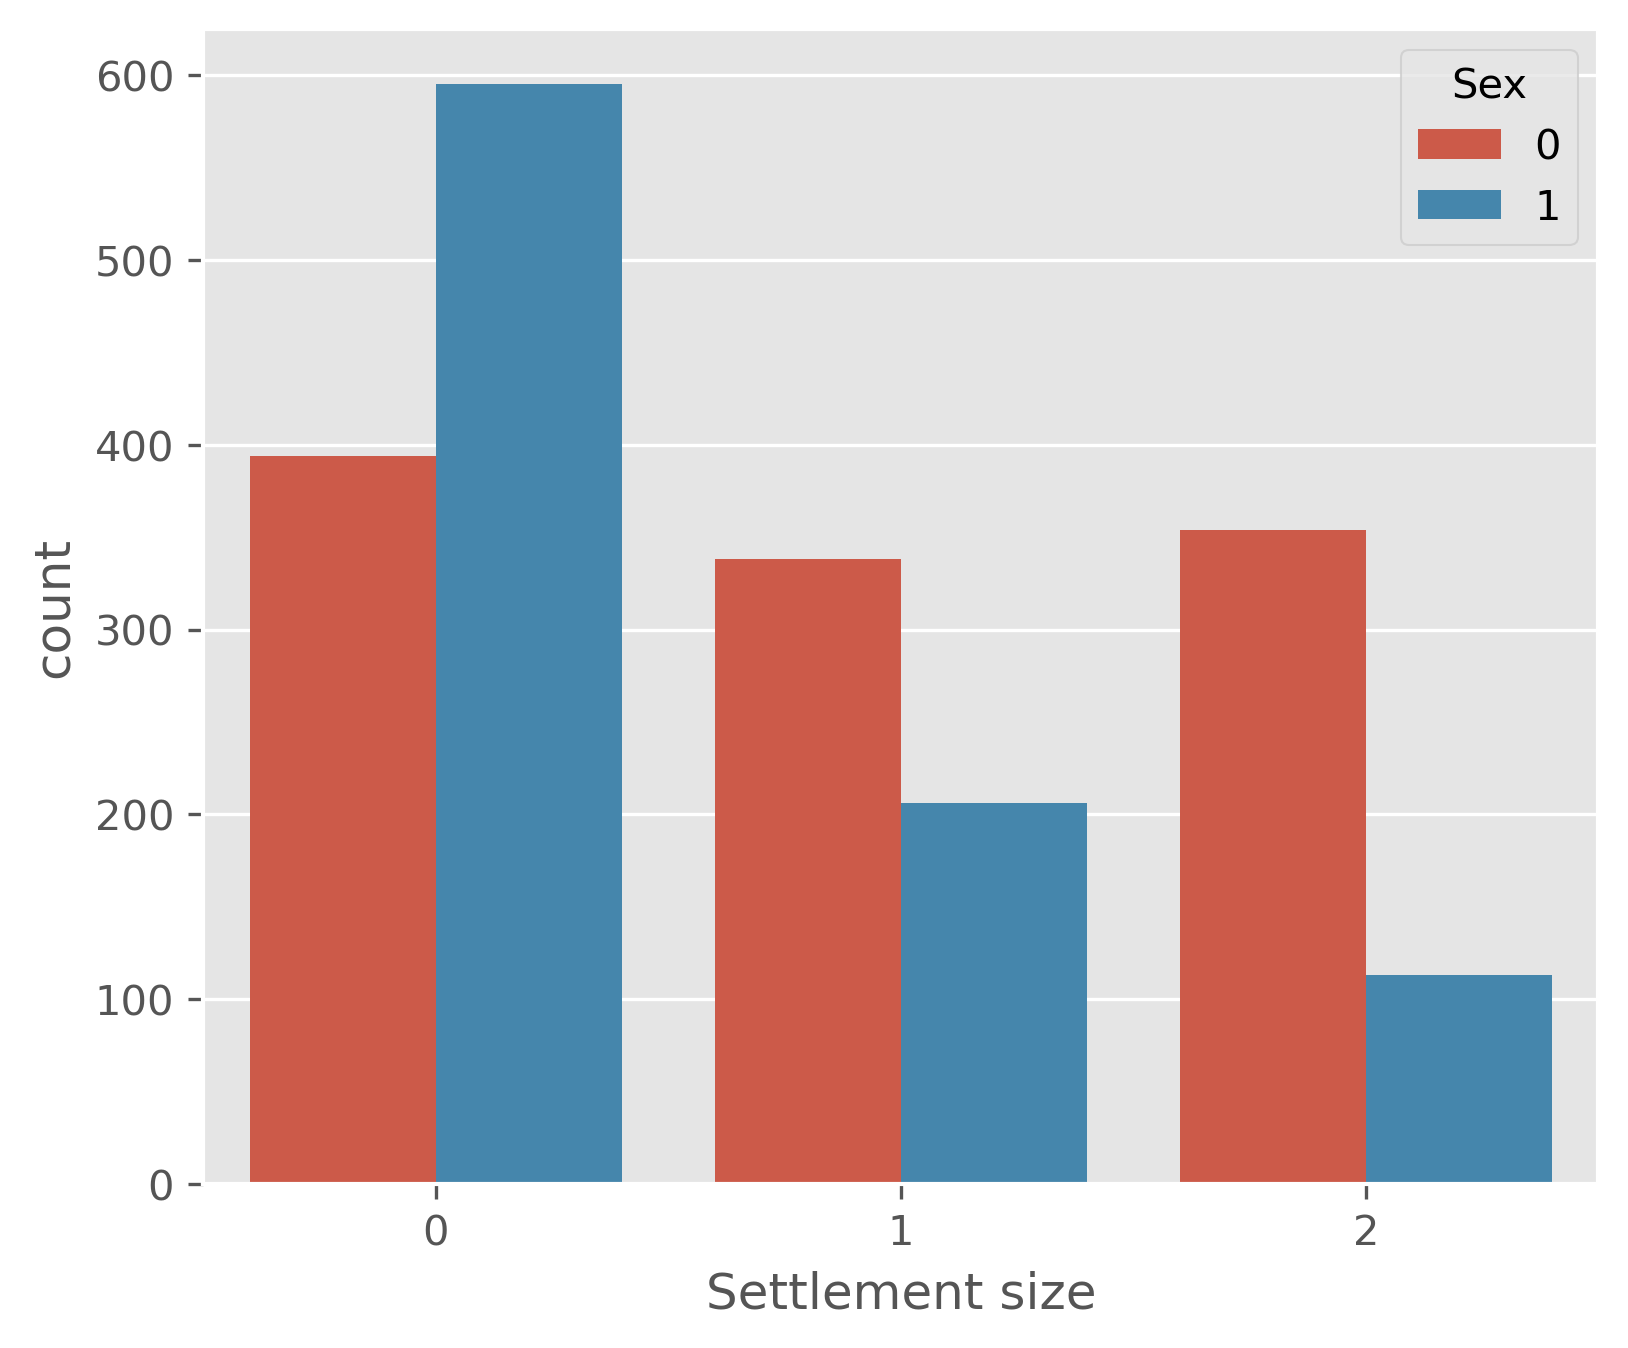

In [14]:
plt.figure(figsize=(6,5), dpi=300)
sns.countplot(x='Settlement size',hue='Sex', data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

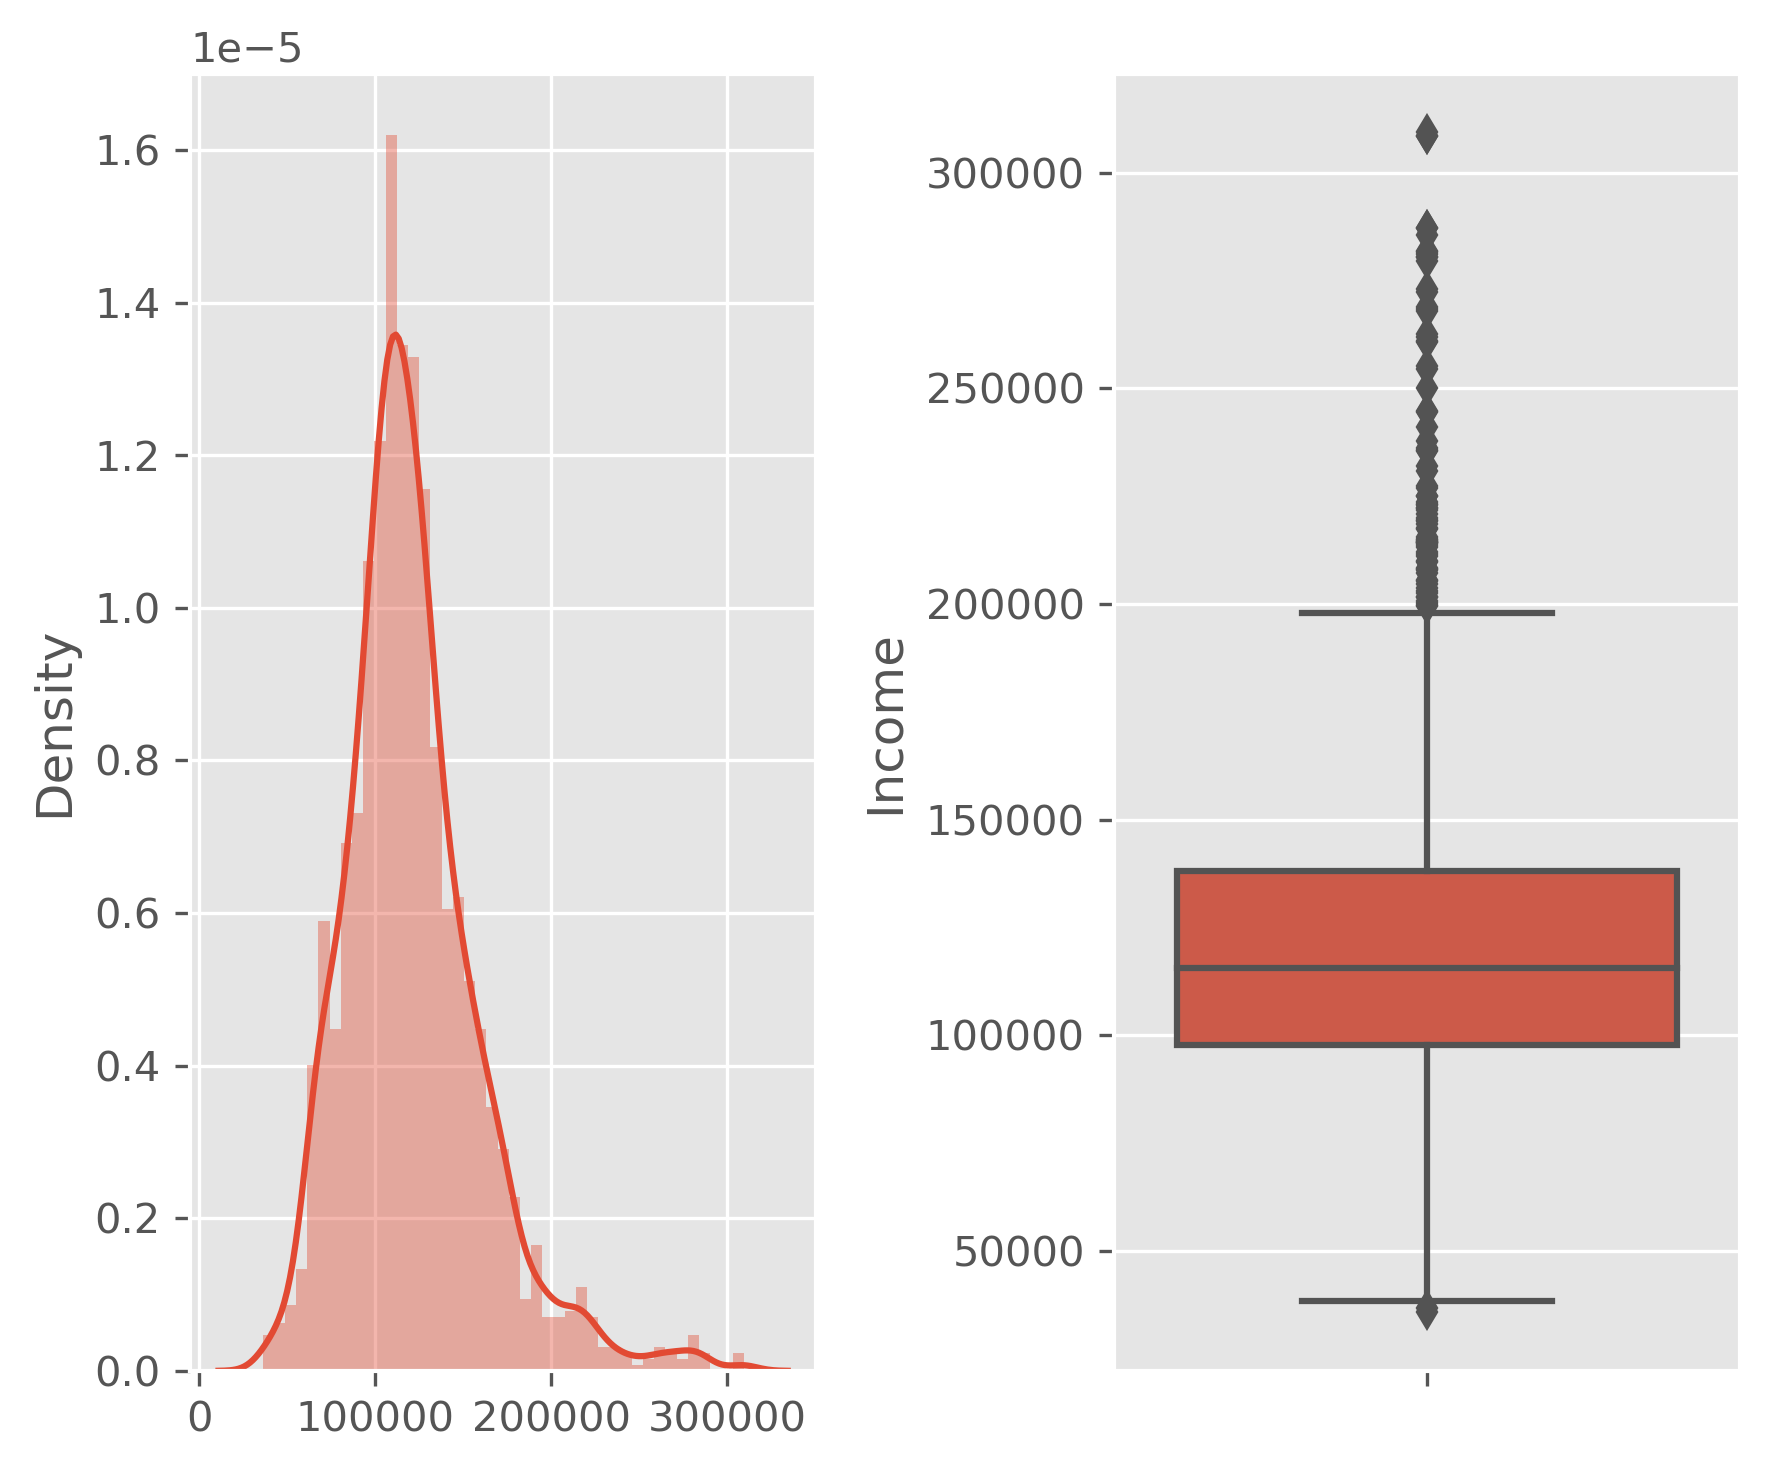

In [15]:
plt.figure(figsize=(6,5), dpi=300)
plt.subplot(1,2,1)
sns.distplot(x=df['Income'])

plt.subplot(1,2,2)
sns.boxplot(y=df['Income'])

plt.tight_layout()
plt.show

In [16]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [17]:
X = df[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']].values
X[:5] 

array([[     0,      0,     67,      2, 124670,      1,      2],
       [     1,      1,     22,      1, 150773,      1,      2],
       [     0,      0,     49,      1,  89210,      0,      0],
       [     0,      0,     45,      1, 171565,      1,      1],
       [     0,      0,     53,      1, 149031,      1,      1]],
      dtype=int64)

## ======================================================
# Model Traning
## Elbow Method (Find the best value of K)

In [18]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,21):
    km = KMeans(n_clusters=k)
    km.fit(X)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

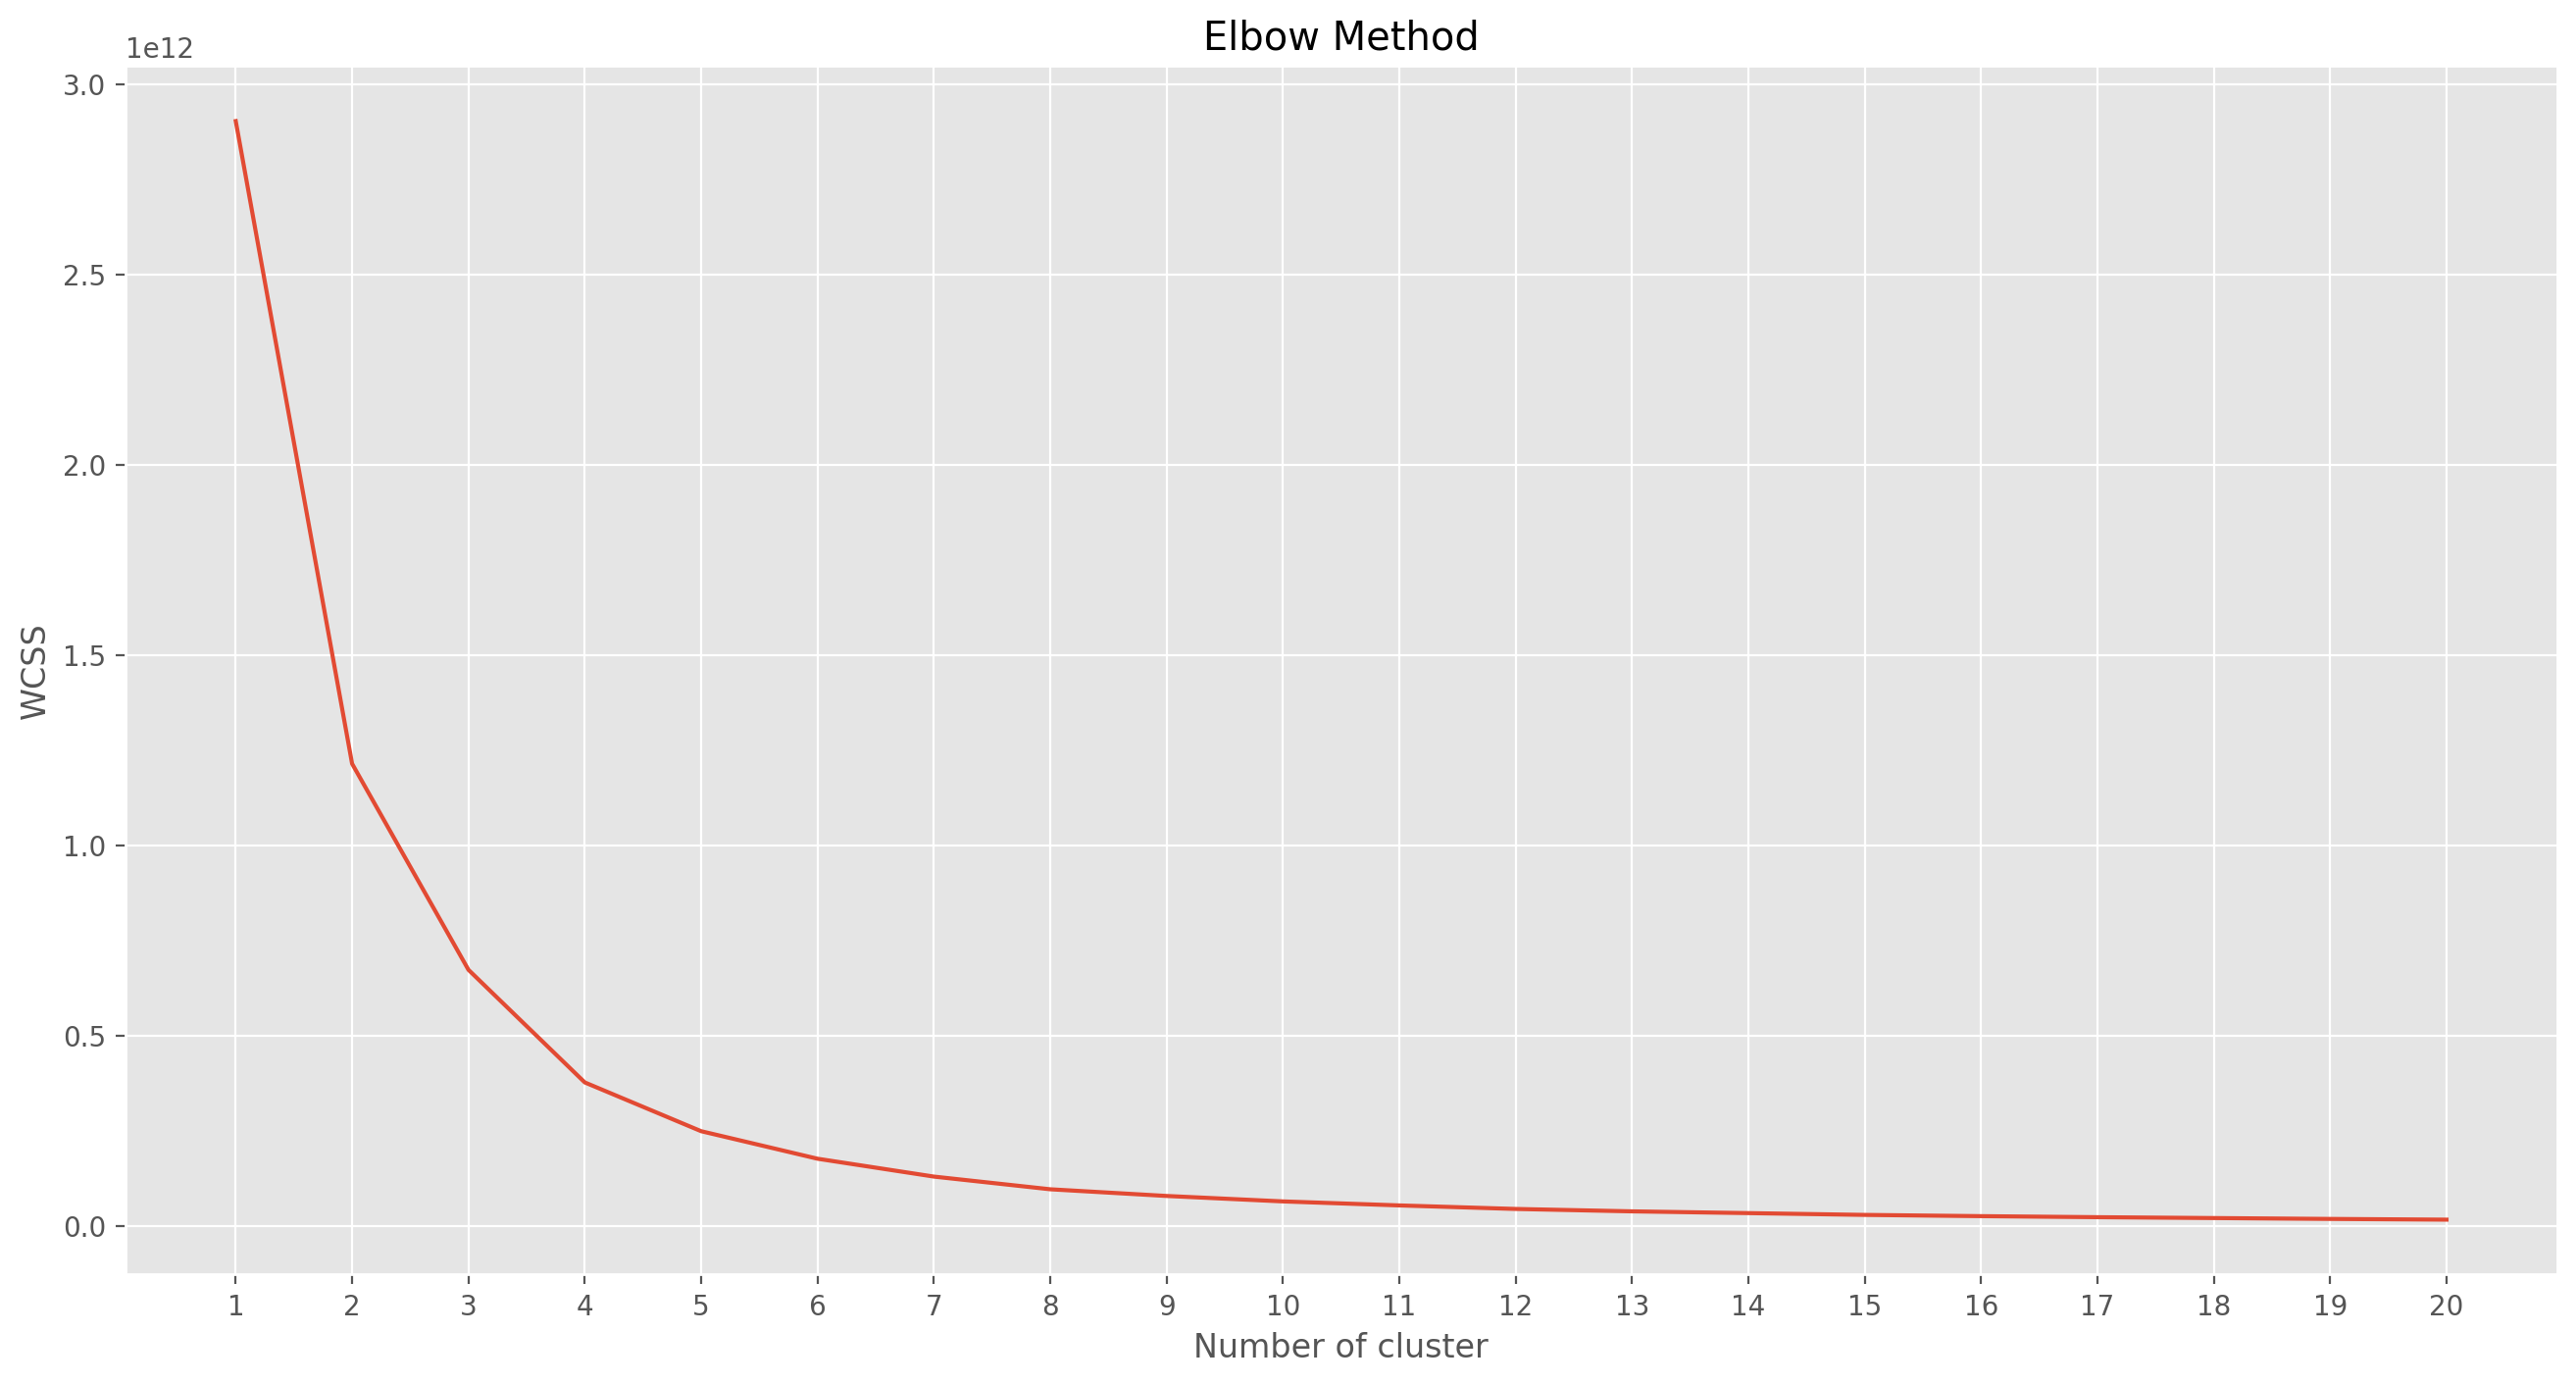

In [19]:
k = range(1,21)
plt.figure(figsize=(16,8), dpi=200)
sns.lineplot(x=k,y=wcss)

plt.xticks(k)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')

In [20]:
#Best Model
km_best = KMeans(n_clusters=4)
km_best.fit(X)

KMeans(n_clusters=4)

In [21]:
y_kmeans = km_best.predict(X)
y_kmeans[:200]

array([0, 1, 3, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 3, 0, 3, 0, 1, 2, 1, 0, 1,
       3, 1, 0, 3, 3, 1, 0, 1, 1, 0, 1, 3, 1, 0, 1, 0, 0, 3, 1, 0, 0, 1,
       1, 1, 1, 3, 0, 0, 3, 1, 3, 0, 1, 3, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 0, 0, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 3, 0, 3, 0, 0, 2,
       1, 3, 0, 0, 3, 0, 1, 2, 1, 1, 0, 2, 3, 0, 3, 0, 0, 2, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 3, 1, 0, 0, 3, 0, 1, 0, 1, 1,
       3, 0, 2, 0, 2, 0, 0, 0, 3, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2,
       2, 3, 0, 3, 1, 3, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 3, 3, 1, 0, 0, 2,
       0, 0, 0, 0, 1, 1, 3, 1, 0, 0, 2, 3, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0,
       0, 1])

In [22]:
centroid = km_best.cluster_centers_
centroid

array([[5.06792059e-01, 5.28735632e-01, 3.44200627e+01, 1.00313480e+00,
        1.14832222e+05, 8.28631139e-01, 7.13688610e-01],
       [3.04157549e-01, 4.35448578e-01, 4.09124726e+01, 1.19256018e+00,
        1.54393433e+05, 1.24945295e+00, 1.23413567e+00],
       [2.81553398e-01, 3.98058252e-01, 4.47864078e+01, 1.34951456e+00,
        2.25808272e+05, 1.77669903e+00, 1.47572816e+00],
       [5.40372671e-01, 5.11387164e-01, 3.22318841e+01, 8.94409938e-01,
        7.90856128e+04, 1.53209110e-01, 1.63561077e-01]])

In [23]:
pd.DataFrame(centroid)

,0,1,2,3,4,5,6
0,0.506792,0.528736,34.420063,1.003135,114832.221526,0.828631,0.713689
1,0.304158,0.435449,40.912473,1.192560,154393.433260,1.249453,1.234136
2,0.281553,0.398058,44.786408,1.349515,225808.271845,1.776699,1.475728
3,0.540373,0.511387,32.231884,0.894410,79085.612836,0.153209,0.163561


In [24]:
km_best.inertia_

377126721843.4196

Title: Unsupervised Clustering Analysis of Demographic Data

Objective:
To perform unsupervised clustering on demographic data using the KMeans algorithm to identify distinct segments within the population.

Key Steps:

1. Data Preparation:
   - Loaded and inspected a dataset containing demographic information, including ID, Sex, Marital status, Age, Education, Income, Occupation, and Settlement size.
   - Checked for duplicates and missing values to ensure data quality.

2. Exploratory Data Analysis (EDA):
   - Conducted EDA to gain insights into the distribution and relationships among variables.
   - Utilized visualizations such as count plots, pie charts, line plots, box plots, and violin plots to analyze both categorical and continuous variables.

3. Data Preprocessing:
   - Encoded categorical variables using LabelEncoder to convert them into numerical format suitable for clustering algorithms.
   - Standardized continuous variables to ensure uniform scaling across features.

4. Model Training and Evaluation:
   - Applied the KMeans clustering algorithm to the preprocessed data.
   - Determined the optimal number of clusters using the elbow method, which suggested 4 clusters.
   - Trained the KMeans model with the identified number of clusters and evaluated its performance using the inertia metric.

Key Findings:
- The unsupervised clustering analysis successfully grouped individuals into distinct segments based on demographic attributes.
- Each cluster represents a unique demographic profile within the population, allowing for targeted marketing and resource allocation strategies.

Conclusion:
- The application of unsupervised clustering techniques on demographic data provides valuable insights into population segmentation and can inform strategic decision-making in various domains such as marketing, healthcare, and social sciences.
- By leveraging the identified clusters, organizations can tailor their products, services, and campaigns to better meet the needs and preferences of different demographic segments.

Inertia: 377126721843.4196

This summary highlights the key steps, findings, and implications of the unsupervised clustering analysis on demographic data, providing a concise overview suitable for professional communication and presentations.